The goal of this project is to conduct an exploratory data analysis (EDA) and credit assessment for customers of L&T Financial Services, using a dataset that includes customer demographics, loan details, credit history, and other relevant information. The main objectives are to:

* Data Assessment & Preprocessing: Clean and prepare the dataset for analysis by handling missing values, encoding categorical v variables, and performing feature engineering.

* Exploratory Data Analysis (EDA): Analyze the data to identify patterns, trends, and relationships between customer attributes (like CIBIL score, income, age) and loan outcomes (like default).

* Credit Risk Assessment & Predictive Modeling: Build and evaluate machine learning models to predict the likelihood of loan default, aiming to improve credit assessment and reduce the risk of non-performing assets (NPAs).

* Visualization: Create interactive visualizations in Power BI to present insights and facilitate data-driven decision-making.1m

# Problem definition

#### Exploratory Data Analysis and Credit Assessment in Financial Services

# Data Aquisition

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# loading packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

In [3]:
# load all datasets

city_data = pd.read_excel("City_Master.xlsx")
loan_data= pd.read_csv("Loan_Details_transactions.csv")
branch_data= pd.read_csv("Branch_ID_Master.csv")
State_Region_Mapping= pd.read_excel("State_Region_Mapping.xlsx")
loanMap_data= pd.read_csv("Loan_status_mapping.csv")
Region_Master= pd.read_excel("Region_Master.xlsx")
postal_Code_Master= pd.read_excel("Postal_Code_Master.xlsx")
State_Master= pd.read_excel("State_Master.xlsx")



# Data exploration

In [ ]:
# city_data Exploration

In [ ]:
city_data.head()

,City_Code,State_Code,City_Name
0,CT01,ST15,Mumbai
1,CT02,ST15,Pune
2,CT03,ST24,Chennai
3,CT04,ST24,Coimbatore
4,CT05,ST25,Hyderabad


In [ ]:
city_data.columns

Index(['City_Code', 'State_Code', 'City_Name'], dtype='object')

In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City_Code   29 non-null     object
 1   State_Code  29 non-null     object
 2   City_Name   29 non-null     object
dtypes: object(3)
memory usage: 824.0+ bytes


In [ ]:
city_data.shape

(29, 3)

In [ ]:
# summary of object data
city_data.describe()

,City_Code,State_Code,City_Name
count,29,29,29
unique,29,18,29
top,CT01,ST15,Mumbai
freq,1,3,1


In [ ]:
# frequency under all groups
city_data['City_Code'].value_counts().sum()

29

In [ ]:
city_data['City_Name'].value_counts().sum()

29

#### Inference of City Data
The dataset contains 29 rows and 3 columns: City_Code, State_Code, and City_Name, all of which are string-type objects. Each city has a unique City_Code and City_Name, with 18 unique State_Code values. The most frequent State_Code is ST15 (appearing 3 times).

In [ ]:
# branch_data Exploration

In [ ]:
branch_data.head()

,Branch_Id,Region_Code
0,1,R3
1,2,R3
2,3,R3
3,5,R3
4,7,R3


In [ ]:
branch_data.columns

Index(['Branch_Id', 'Region_Code'], dtype='object')

In [ ]:
branch_data.shape

(82, 2)

In [ ]:
branch_data.describe(include='object')

,Region_Code
count,82
unique,4
top,R2
freq,22


In [ ]:
branch_data[branch_data.duplicated()==True].sum()

,0
Branch_Id,0
Region_Code,0


#### Branch Data Inference
The dataset comprises 82 rows and 2 columns: Branch_Id and Region_Code. Each Branch_Id is likely unique to a specific branch, while Region_Code maps these branches to their respective regions. The data can be used to analyze branch distribution across different regions.

In [ ]:
# loanMap_data exploration

In [ ]:
loanMap_data.head()

,Loan_Id,Loan_Default
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [ ]:
loanMap_data.columns

Index(['Loan_Id', 'Loan_Default'], dtype='object')

In [ ]:
loanMap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Loan_Id       23315 non-null  int64
 1   Loan_Default  23315 non-null  int64
dtypes: int64(2)
memory usage: 364.4 KB


In [ ]:
loanMap_data.shape

(23315, 2)

In [ ]:
#identifying unique values
loanMap_data['Loan_Id'].unique()

array([    1,     2,     3, ..., 23313, 23314, 23315])

In [ ]:
loanMap_data[loanMap_data.duplicated()==True].sum()

,0
Loan_Id,0
Loan_Default,0


#### loanMap_data Inference
The dataset has 23,315 rows and 2 columns: Loan_Id and Loan_Default, both of which are integers. Each Loan_Id uniquely identifies a loan, and Loan_Default indicates whether a loan defaulted, with all values present and no missing data.

In [ ]:
# loan data Exploration

In [ ]:
loan_data.head()

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES
0,1,36439,65850,56.19,64,CT01,ST15,400001,14-06-1990,Self employed,...,1,1,0,0,0,0,0,0,0yrs 0mon,0
1,2,48749,69303,72.15,67,CT03,ST24,600020,01-01-1991,Salaried,...,1,1,0,0,0,0,783,0,2yrs 6mon,0
2,3,55348,66340,85.00,2,CT13,ST04,801110,16-08-1993,Self employed,...,1,1,0,0,0,0,0,0,0yrs 0mon,0
3,4,48849,64133,77.96,217,CT06,ST22,302029,01-01-1989,Self employed,...,1,1,0,0,0,0,0,0,0yrs 0mon,0
4,5,40394,59386,70.72,74,CT03,ST24,600020,31-12-1974,Self employed,...,1,1,0,0,0,0,14,1,3yrs 1mon,1


In [ ]:
loan_data.columns

Index(['Loan_Id', 'Disbursed_Amount', 'Asset_Cost', 'ltv', 'Branch_Id',
       'City_Code', 'State_Code', 'Postal_Code', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES'],
      dtype='object')

In [ ]:
loan_data.shape

(23315, 21)

In [ ]:
loan_data.describe()

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,Postal_Code,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
count,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.0,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000
mean,11658.000000,54297.647309,75842.182887,74.701607,72.079262,505937.177439,1.0,0.845078,0.075531,0.141068,0.023161,0.002059,291.234956,0.100622,0.205790
std,6730.605099,13061.877434,18988.525635,11.462722,69.095008,204520.532113,0.0,0.361838,0.264252,0.348099,0.150418,0.045328,338.490214,0.388782,0.699901
min,1.000000,13369.000000,37230.000000,17.130000,1.000000,110039.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5829.500000,46949.000000,65629.000000,68.830000,13.000000,391510.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11658.000000,53759.000000,70929.000000,76.710000,61.000000,524225.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17486.500000,60379.000000,79354.500000,83.630000,121.000000,680503.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,679.000000,0.000000,0.000000
max,23315.000000,592460.000000,715186.000000,94.980000,261.000000,834008.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,7.000000,23.000000


In [ ]:
loan_data.describe(include='object')

,City_Code,State_Code,Date_of_Birth,Employment_Type,DisbursalDate,CREDIT.HISTORY.LENGTH
count,23315,23315,23315,22545,23315,23315
unique,29,18,8729,2,84,212
top,CT17,ST12,01-01-1988,Self employed,31-10-2018,0yrs 0mon
freq,873,2492,235,12724,862,11891


## yet to complete...
**continuing**

In [ ]:
#Checking for Missing Values
loan_data.isnull().sum()

,0
Loan_Id,0
Disbursed_Amount,0
Asset_Cost,0
ltv,0
Branch_Id,0
City_Code,0
State_Code,0
Postal_Code,0
Date_of_Birth,0
Employment_Type,770


In [ ]:
#checking for duplicates
loan_data[loan_data.duplicated()].sum()

,0
Loan_Id,0
Disbursed_Amount,0
Asset_Cost,0
ltv,0.0
Branch_Id,0
City_Code,0
State_Code,0
Postal_Code,0
Date_of_Birth,0
Employment_Type,0


In [ ]:
#Descriptive Statistics for numerical columns
loan_data.describe()

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,Postal_Code,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES
count,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.0,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000,23315.000000
mean,11658.000000,54297.647309,75842.182887,74.701607,72.079262,505937.177439,1.0,0.845078,0.075531,0.141068,0.023161,0.002059,291.234956,0.100622,0.205790
std,6730.605099,13061.877434,18988.525635,11.462722,69.095008,204520.532113,0.0,0.361838,0.264252,0.348099,0.150418,0.045328,338.490214,0.388782,0.699901
min,1.000000,13369.000000,37230.000000,17.130000,1.000000,110039.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5829.500000,46949.000000,65629.000000,68.830000,13.000000,391510.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,11658.000000,53759.000000,70929.000000,76.710000,61.000000,524225.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17486.500000,60379.000000,79354.500000,83.630000,121.000000,680503.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,679.000000,0.000000,0.000000
max,23315.000000,592460.000000,715186.000000,94.980000,261.000000,834008.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,890.000000,7.000000,23.000000


In [ ]:
loan_data.describe(include='object')  # Categorical columns

,City_Code,State_Code,Date_of_Birth,Employment_Type,DisbursalDate,CREDIT.HISTORY.LENGTH
count,23315,23315,23315,22545,23315,23315
unique,29,18,8729,2,84,212
top,CT17,ST12,01-01-1988,Self employed,31-10-2018,0yrs 0mon
freq,873,2492,235,12724,862,11891


In [ ]:
#verifying datatypes
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Loan_Id                              23315 non-null  int64  
 1   Disbursed_Amount                     23315 non-null  int64  
 2   Asset_Cost                           23315 non-null  int64  
 3   ltv                                  23315 non-null  float64
 4   Branch_Id                            23315 non-null  int64  
 5   City_Code                            23315 non-null  object 
 6   State_Code                           23315 non-null  object 
 7   Postal_Code                          23315 non-null  int64  
 8   Date_of_Birth                        23315 non-null  object 
 9   Employment_Type                      22545 non-null  object 
 10  DisbursalDate                        23315 non-null  object 
 11  MobileNo_Avl_Flag           

In [ ]:
#checking for unique values
loan_data.nunique()

,0
Loan_Id,23315
Disbursed_Amount,6057
Asset_Cost,13886
ltv,4527
Branch_Id,82
City_Code,29
State_Code,18
Postal_Code,29
Date_of_Birth,8729
Employment_Type,2


In [ ]:
#Handling missing values

The only column with missing data is Employment_Type, which has 770 missing entries.
For categorical variables-replace missing values with the most frequent category (mode).
For numerical variables-use mean, median, or other imputation methods.

In [ ]:
loan_data['Employment_Type'].fillna(loan_data['Employment_Type'].mode()[0], inplace=True)
loan_data['Disbursed_Amount'].fillna(loan_data['Disbursed_Amount'].mean(), inplace=True)

Also Date_of_Birth and DisbursalDate should be converted to datetime

In [ ]:
loan_data['Date_of_Birth'] = pd.to_datetime(loan_data['Date_of_Birth'], errors='coerce')   #Date transformation
loan_data['DisbursalDate'] = pd.to_datetime(loan_data['DisbursalDate'], errors='coerce')


Age calculation: customer age to be calculated from the Date_of_Birth column.

In [ ]:
# Convert the 'Date_of_Birth' column to datetime if it's not already in datetime format
loan_data['Date_of_Birth'] = pd.to_datetime(loan_data['Date_of_Birth'], errors='coerce')

# Now calculate the customer's age
loan_data['Age'] = ((pd.to_datetime('today') - loan_data['Date_of_Birth']).dt.days / 365).astype(int)

# Display the first few rows to verify
loan_data[['Date_of_Birth', 'Age']].head()


,Date_of_Birth,Age
0,1990-06-14,34
1,1991-01-01,33
2,1993-08-16,31
3,1989-01-01,35
4,1974-12-31,49


Feature scaling: Apply min-max scaling or z-score normalization to numeric columns for model building

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
loan_data[['Disbursed_Amount', 'Asset_Cost']] = scaler.fit_transform(loan_data[['Disbursed_Amount', 'Asset_Cost']])

Data Visualisation

In [ ]:
print(loan_data.columns)

Index(['Loan_Id', 'Disbursed_Amount', 'Asset_Cost', 'ltv', 'Branch_Id',
       'City_Code', 'State_Code', 'Postal_Code', 'Date_of_Birth',
       'Employment_Type', 'DisbursalDate', 'MobileNo_Avl_Flag', 'Aadhar_flag',
       'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag',
       'PERFORM_CNS.SCORE', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'Age'],
      dtype='object')


<Axes: xlabel='Employment_Type', ylabel='Disbursed_Amount'>

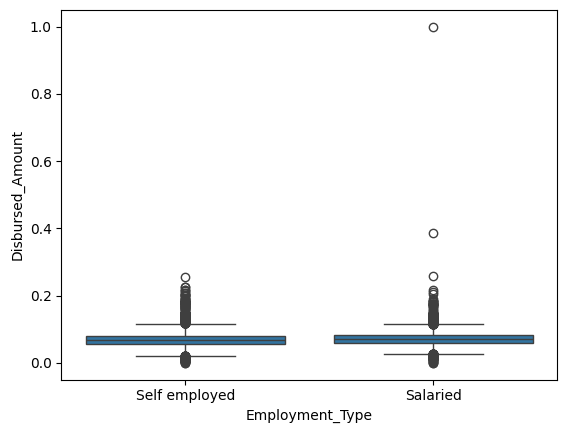

In [ ]:
#Relationship between loan disbursement and demographic features:
sns.boxplot(x='Employment_Type', y='Disbursed_Amount', data=loan_data)

###Exploratory Data Analysis (EDA)


### Univariate Analysis

Histograms or Bar Plots to understand the distribution of numerical and categorical variables:
Distribution of Disbursed_Amount, Asset_Cost, and PERFORM_CNS.SCORE.
Distribution of categorical variables like Employment_Type, MobileNo_Avl_Flag, Aadhar_flag, etc

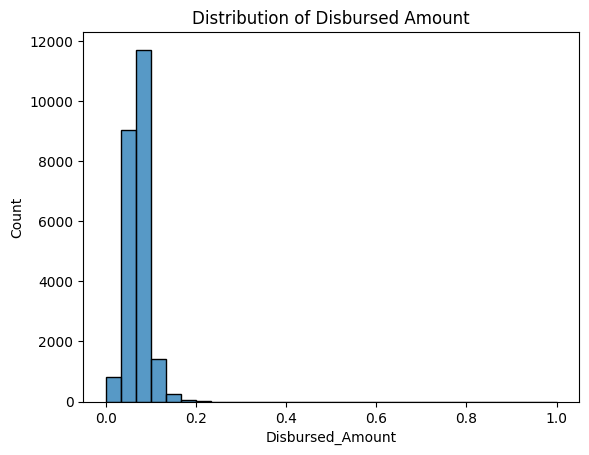

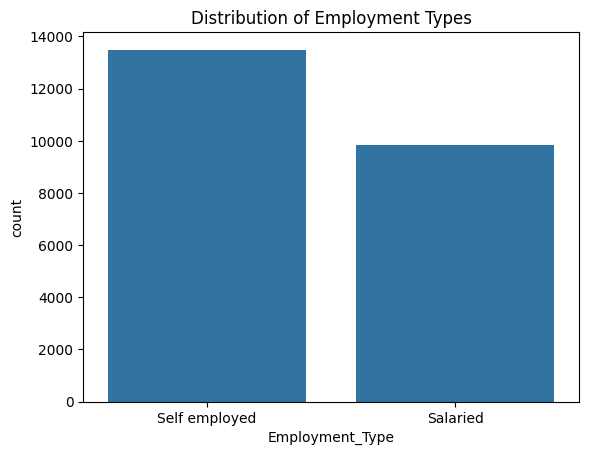

In [ ]:
# Plot histogram for a numeric variable
sns.histplot(loan_data['Disbursed_Amount'], bins=30)
plt.title('Distribution of Disbursed Amount')
plt.show()

# Bar plot for a categorical variable
sns.countplot(x='Employment_Type', data=loan_data)
plt.title('Distribution of Employment Types')
plt.show()


### Bivariate and Multivariate Analysis

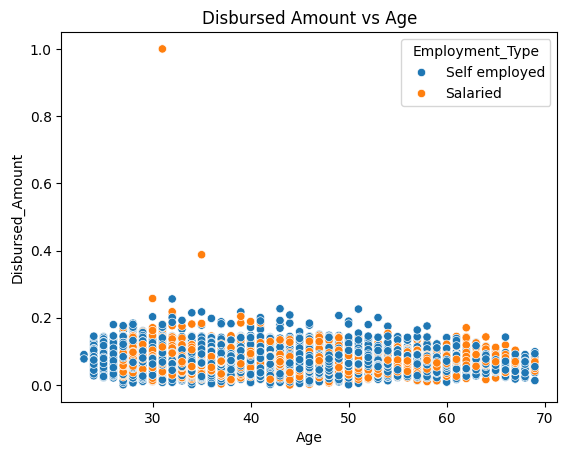

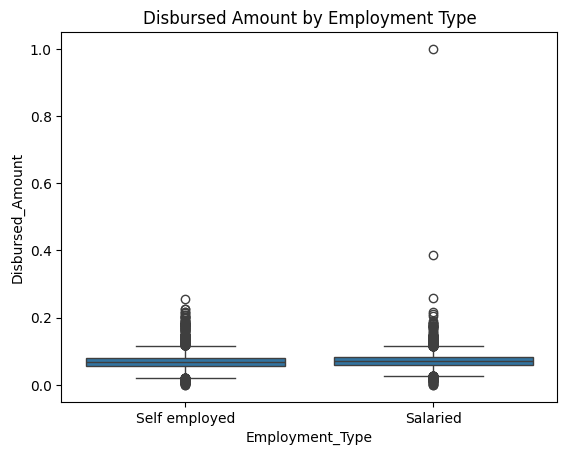

In [ ]:
# Scatter plot: Disbursed Amount vs Age
sns.scatterplot(x='Age', y='Disbursed_Amount', hue='Employment_Type', data=loan_data)
plt.title('Disbursed Amount vs Age')
plt.show()

# Box plot: Employment Type vs Disbursed Amount
sns.boxplot(x='Employment_Type', y='Disbursed_Amount', data=loan_data)
plt.title('Disbursed Amount by Employment Type')
plt.show()


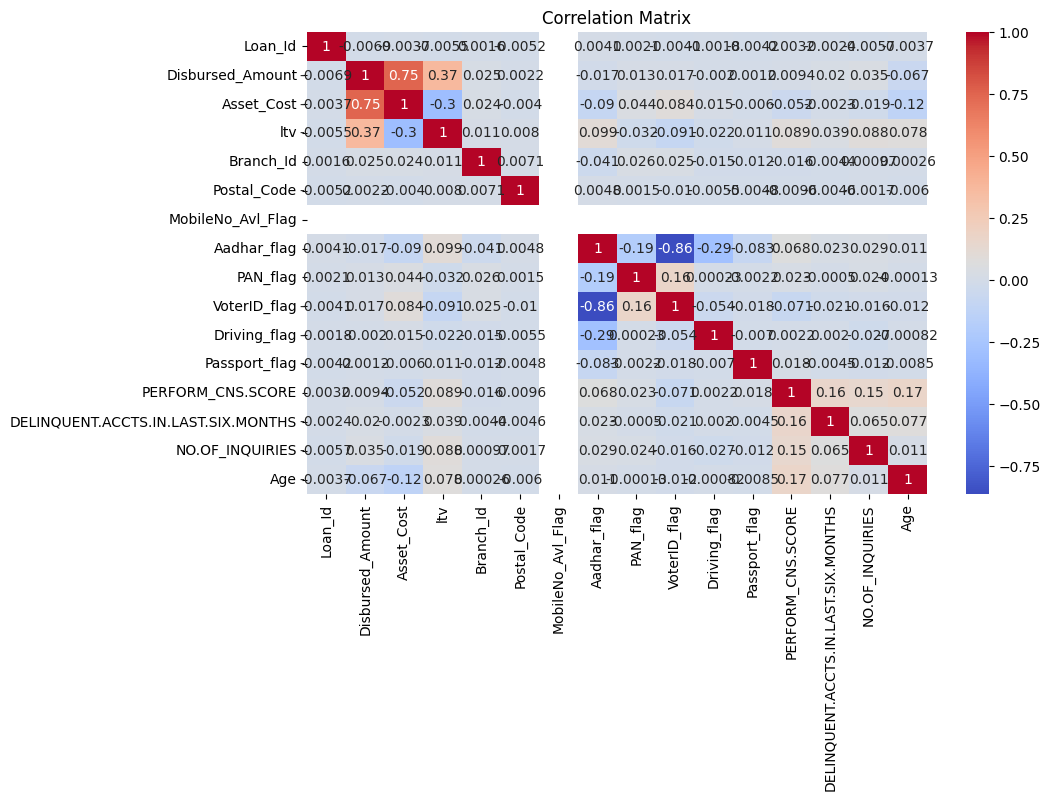

In [ ]:
#Correlation matrix.
# for only numerical columns for correlation matrix
numerical_cols = loan_data.select_dtypes(include=[np.number])

# Displaying the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



### Outlier detection and treatment



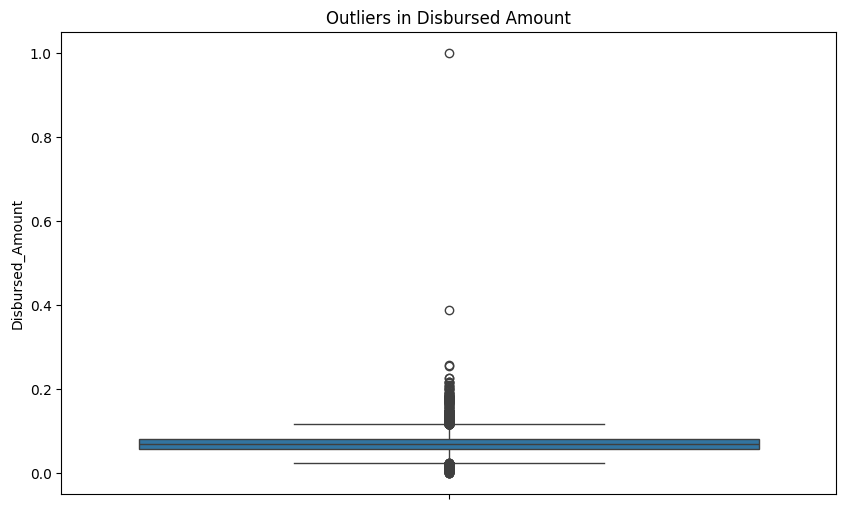

In [ ]:
# Box plot to detect outliers in Disbursed Amount
plt.figure(figsize=(10, 6))
sns.boxplot(y=loan_data['Disbursed_Amount'])
plt.title('Outliers in Disbursed Amount')
plt.show()
#Handling outliers
#Cap outliers at the 1st and 99th percentiles
upper_limit = loan_data['Disbursed_Amount'].quantile(0.99)
lower_limit = loan_data['Disbursed_Amount'].quantile(0.01)

loan_data['Disbursed_Amount'] = np.where(loan_data['Disbursed_Amount'] > upper_limit, upper_limit, loan_data['Disbursed_Amount'])
loan_data['Disbursed_Amount'] = np.where(loan_data['Disbursed_Amount'] < lower_limit, lower_limit, loan_data['Disbursed_Amount'])

### Feature Engineering

### Hypothesis Testing

### Loan Data inference

# Rest of the data needs to done in the same way

# **City Level Data**

#### city_postal_data will store the merge of postal_Code_Master, State_Master, State_Region_Mapping, and Region_Master and the attributes are:
* City_Code
* State_Code
* City_Name
* Postal_Code
* State_Name
* State Name
* Region_ID
* Region_Name

In [ ]:
# Merge city_data with postal_Code_Master, State_Master, State_Region_Mapping, and Region_Master
city_postal_data =(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(city_data, postal_Code_Master, on=['City_Code', 'City_Name'], how='left'),
                State_Master, on='State_Code', how='left'
            ),
            State_Region_Mapping, on='State_Code', how='left'
        ),
        Region_Master, on='Region_ID', how='left'
    )
)


# Data Exploration

In [ ]:
city_postal_data.head()

,City_Code,State_Code,City_Name,Postal_Code,State_Name,Region,State Name,Region_ID,Region_Name
0,CT01,ST15,Mumbai,400001,Maharashtra,West,Maharashtra,R4,West
1,CT01,ST15,Mumbai,400053,Maharashtra,West,Maharashtra,R4,West
2,CT01,ST15,Mumbai,422001,Maharashtra,West,Maharashtra,R4,West
3,CT02,ST15,Pune,411002,Maharashtra,West,Maharashtra,R4,West
4,CT02,ST15,Pune,411006,Maharashtra,West,Maharashtra,R4,West


In [ ]:
print(city_postal_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   City_Code    49 non-null     object
 1   State_Code   49 non-null     object
 2   City_Name    49 non-null     object
 3   Postal_Code  49 non-null     int64 
 4   State_Name   49 non-null     object
 5   Region       42 non-null     object
 6   State Name   42 non-null     object
 7   Region_ID    42 non-null     object
 8   Region_Name  42 non-null     object
dtypes: int64(1), object(8)
memory usage: 3.6+ KB
None


In [ ]:
print(city_postal_data.describe(include='object'))

       City_Code State_Code  City_Name State_Name Region State Name Region_ID  \
count         49         49         49         49     42         42        42   
unique        29         18         29         18      4         14         4   
top         CT10       ST12  Bangalore  Karnataka  South  Karnataka        R2   
freq           4          7          4          7     19          7        19   

       Region_Name  
count           42  
unique           4  
top          South  
freq            19  


In [ ]:
print(city_postal_data.shape)

(49, 9)


# Data Preparation

## Data Cleaning

In [ ]:
# Using dataframe city_postal_data: check for duplicate data
city_postal_data.duplicated().sum()

0

In [ ]:
# Drop rows with any NaN values
#cleaned_data = city_postal_data.dropna()

In [ ]:
# removing duplicate rows
city_postal_data.drop(columns =['State Name'], inplace= True)
city_postal_data.drop(columns =['Region'], inplace= True)

# Trasformation of data

In [ ]:
# Convert the 'City_Code' column to string type and then remove 'CT'
city_postal_data['City_Code'] = city_postal_data['City_Code'].astype(str).str.replace('CT', '', regex=False)

# Convert the 'State_Code' column to string type and then remove 'ST'
city_postal_data['State_Code'] = city_postal_data['State_Code'].astype(str).str.replace('ST', '', regex=False)

In [ ]:
city_postal_data.head()

,City_Code,State_Code,City_Name,Postal_Code,State_Name,Region_ID,Region_Name
0,01,15,Mumbai,400001,Maharashtra,R4,West
1,01,15,Mumbai,400053,Maharashtra,R4,West
2,01,15,Mumbai,422001,Maharashtra,R4,West
3,02,15,Pune,411002,Maharashtra,R4,West
4,02,15,Pune,411006,Maharashtra,R4,West


In [ ]:
# Sort the DataFrame by 'State_Name' alphabetically
city_postal_data_sorted = city_postal_data.sort_values(by='State_Name', ascending=True)
# Drop the unwanted columns from the DataFrame
#city_postal_data_sorted = city_postal_data_sorted.drop(columns=['Postal_Code_Scaled', 'State_Name_Encoded', 'City_Size'])

In [ ]:
city_postal_data_sorted

,City_Code,State_Code,City_Name,Postal_Code,State_Name,Region_ID,Region_Name
42,25,01,Nellore,524225,Andhra Pradesh,R2,South
26,13,04,Patna,801110,Bihar,R3,East
17,09,34,Delhi,110039,Delhi,R1,North
23,11,07,Ahmedabad,382220,Gujarat,R4,West
22,11,07,Ahmedabad,382460,Gujarat,R4,West
28,14,07,Surat,394620,Gujarat,R4,West
31,17,07,Vadodara,391510,Gujarat,R4,West
27,14,07,Surat,394651,Gujarat,R4,West
46,28,11,Ranchi,834008,Jharkhand,R3,East
45,27,11,Jamshedpur,831001,Jharkhand,R3,East


In [ ]:
# Count the number of null values in the 'Region_Name' column
null_region_name_count = city_postal_data_sorted['Region_Name'].isnull().sum()
print(f"null value: {null_region_name_count}")


null value: 7


# Data Visualization

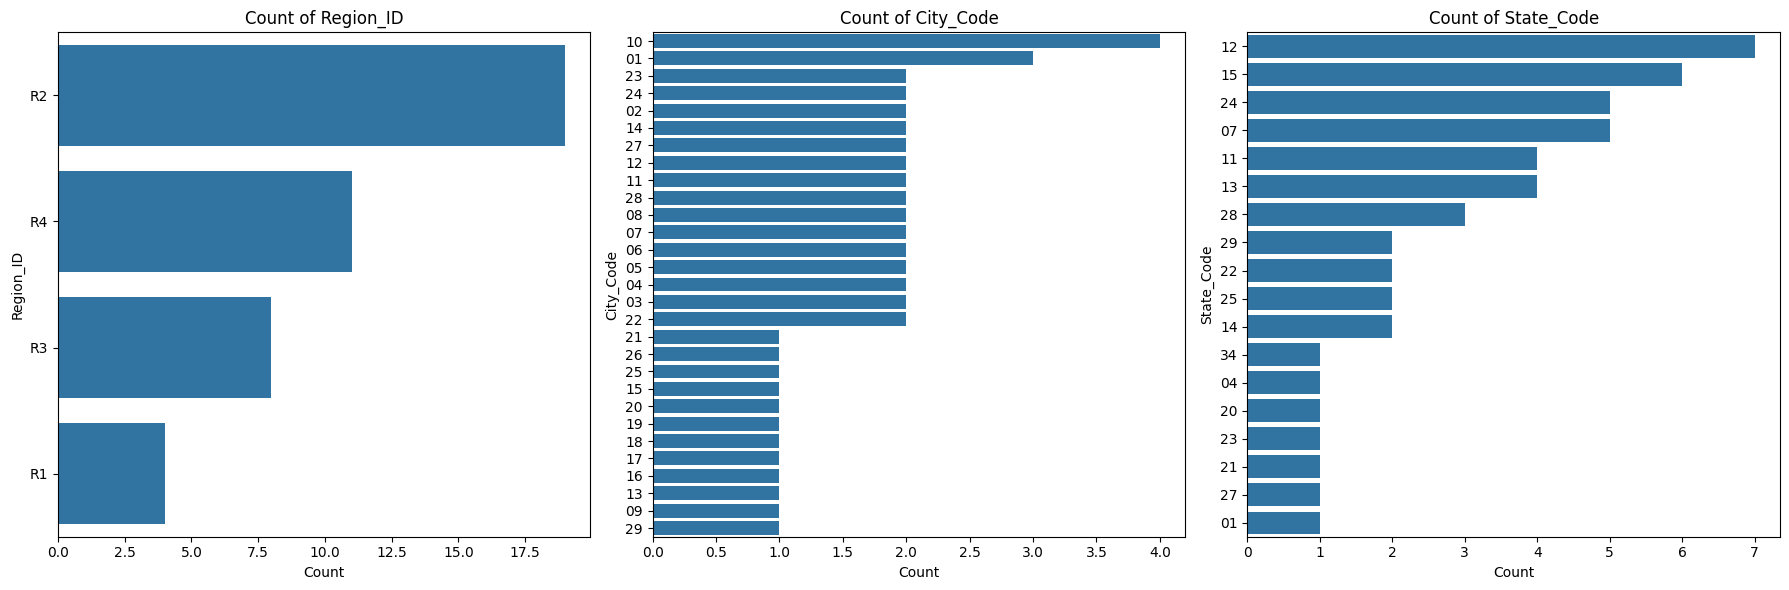

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(18, 6))

# Plot the count of Region_ID
plt.subplot(1, 3, 1)
sns.countplot(y='Region_ID', data=city_postal_data, order=city_postal_data['Region_ID'].value_counts().index)
plt.title('Count of Region_ID')
plt.xlabel('Count')
plt.ylabel('Region_ID')

# Plot the count of City_Code
plt.subplot(1, 3, 2)
sns.countplot(y='City_Code', data=city_postal_data, order=city_postal_data['City_Code'].value_counts().index)
plt.title('Count of City_Code')
plt.xlabel('Count')
plt.ylabel('City_Code')

# Plot the count of State_Code
plt.subplot(1, 3, 3)
sns.countplot(y='State_Code', data=city_postal_data, order=city_postal_data['State_Code'].value_counts().index)
plt.title('Count of State_Code')
plt.xlabel('Count')
plt.ylabel('State_Code')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#  State and Region level data

In [ ]:
# State_Master can be linked with State_Region_Mapping using State_Code.
# State_Region_Mapping can be linked with Region_Master using Region_ID

In [ ]:
# merge State_Master.csv, State_Region_Mapping.csv, on='State_Code', and Region_Master.csv on='Region_ID', ya whatever work try merging these 3 csv s

In [ ]:
state_master_merge=pd.merge(Region_Master,State_Region_Mapping,left_on='Region_ID',right_on='Region_ID',how='right')
state_master_merge=state_master_merge[['Region_ID','State_Code','Region_Name']]
state_master_merge=pd.merge(State_Master,state_master_merge,left_on='State_Code',right_on='State_Code',how='left')
state_master_merge=state_master_merge[['State_Code','State_Name','Region_ID','Region_Name']]

In [ ]:
state_master_merge.head()

,State_Code,State_Name,Region_ID,Region_Name
0,ST01,Andhra Pradesh,R2,South
1,ST02,Arunachal Pradesh,NaN,NaN
2,ST03,Assam,NaN,NaN
3,ST04,Bihar,R3,East
4,ST05,Chhattisgarh,NaN,NaN


In [ ]:
# Count the number of null values in the 'Region_Name' column
null_regioncount = state_master_merge['Region_Name'].isnull().sum()
print(f"null value: {null_regioncount}")

null value: 12


# Branch Level Data

In [ ]:
# branch_data can be linked to Region_Master using Region_ID.
# loan_data can be linked to city_postal_data using City_Code, State_Code, and Postal_Code. It can also be
# linked to branch_data via Branch_Id.

In [ ]:
print(branch_data.columns)
print(Region_Master.columns)


Index(['Branch_Id', 'Region_Code'], dtype='object')
Index(['Region_ID', 'Region_Name'], dtype='object')


### Merging

In [ ]:
# Merging branch_data with Region_Master using Region_Code from branch_data and Region_ID from Region_Master
branch_region_merged = pd.merge(branch_data, Region_Master, left_on='Region_Code', right_on='Region_ID', how='left')

# Checking the resulting merged DataFrame
print(branch_region_merged.head())


   Branch_Id Region_Code Region_ID Region_Name
0          1          R3        R3        East
1          2          R3        R3        East
2          3          R3        R3        East
3          5          R3        R3        East
4          7          R3        R3        East


### Data Exploration

In [ ]:
# Checking the structure and data types
print(branch_region_merged.info())

# Checking for missing values
print(branch_region_merged.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Branch_Id    82 non-null     int64 
 1   Region_Code  82 non-null     object
 2   Region_ID    82 non-null     object
 3   Region_Name  82 non-null     object
dtypes: int64(1), object(3)
memory usage: 2.7+ KB
None
Branch_Id      0
Region_Code    0
Region_ID      0
Region_Name    0
dtype: int64


In [ ]:
#statistics for numerical columns
print(branch_region_merged.describe())



        Branch_Id
count   82.000000
mean   103.414634
std     79.625505
min      1.000000
25%     37.500000
50%     80.500000
75%    150.750000
max    261.000000


In [ ]:
#Count distribution of regions
print(branch_region_merged['Region_Name'].value_counts())

Region_Name
South    22
East     21
North    21
West     18
Name: count, dtype: int64


### Data Cleaning

In [ ]:
# Filling missing values for Region_Name (if any)
branch_region_merged['Region_Name'].fillna('Unknown', inplace=True)

In [ ]:
# Removing duplicates
branch_region_merged.drop_duplicates(inplace=True)


### Feature engineering

In [ ]:
# Creating a new feature: number of branches per region
branch_count_per_region = branch_region_merged.groupby('Region_Name')['Branch_Id'].count().reset_index(name='Branch_Count')

# Merging back into the original data if needed
branch_region_merged = pd.merge(branch_region_merged, branch_count_per_region, on='Region_Name', how='left')

# Checking the updated DataFrame
print(branch_region_merged.head())



   Branch_Id Region_Code Region_ID Region_Name  Branch_Count
0          1          R3        R3        East            21
1          2          R3        R3        East            21
2          3          R3        R3        East            21
3          5          R3        R3        East            21
4          7          R3        R3        East            21


### Data visualisation

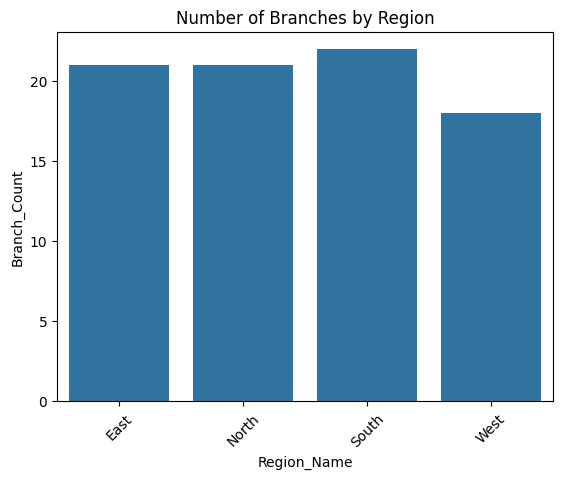

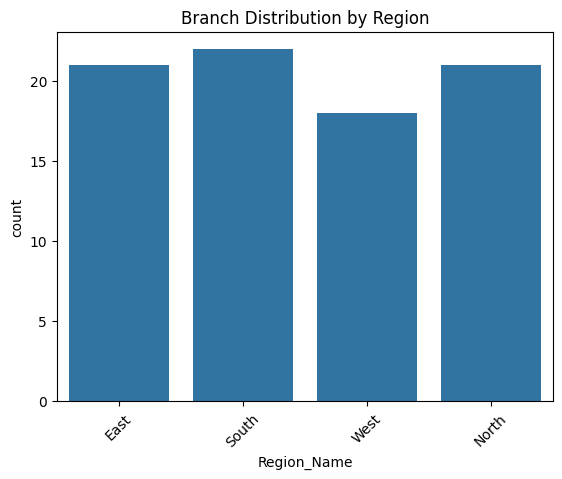

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot for branch count by region
sns.barplot(x='Region_Name', y='Branch_Count', data=branch_count_per_region)
plt.title('Number of Branches by Region')
plt.xticks(rotation=45)
plt.show()


# Count plot for branch distribution across regions
sns.countplot(x='Region_Name', data=branch_region_merged)
plt.title('Branch Distribution by Region')
plt.xticks(rotation=45)
plt.show()


# Loan Data

In [ ]:
# loan_data and loanMap_data can be linked via Loan_Id.

### Merging

In [ ]:
# Merge loan_data with loanMap_data on Loan_Id
loan_data_combined = pd.merge(loan_data, loanMap_data, on='Loan_Id', how='left')

# Checking the merged DataFrame
print(loan_data_combined.head())


   Loan_Id  Disbursed_Amount  Asset_Cost    ltv  Branch_Id City_Code  \
0        1             36439       65850  56.19         64      CT01   
1        2             48749       69303  72.15         67      CT03   
2        3             55348       66340  85.00          2      CT13   
3        4             48849       64133  77.96        217      CT06   
4        5             40394       59386  70.72         74      CT03   

  State_Code  Postal_Code Date_of_Birth Employment_Type  ... Aadhar_flag  \
0       ST15       400001    14-06-1990   Self employed  ...           1   
1       ST24       600020    01-01-1991        Salaried  ...           1   
2       ST04       801110    16-08-1993   Self employed  ...           1   
3       ST22       302029    01-01-1989   Self employed  ...           1   
4       ST24       600020    31-12-1974   Self employed  ...           1   

   PAN_flag  VoterID_flag  Driving_flag  Passport_flag  PERFORM_CNS.SCORE  \
0         0             0        

In [ ]:
loan_data_combined.head()

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age,Loan_Default
0,1,0.039838,0.042215,56.19,64,CT01,ST15,400001,1990-06-14,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0,34,0
1,2,0.061096,0.047308,72.15,67,CT03,ST24,600020,1991-01-01,Salaried,...,0,0,0,0,783,0,2yrs 6mon,0,33,0
2,3,0.072491,0.042938,85.00,2,CT13,ST04,801110,1993-08-16,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0,31,1
3,4,0.061268,0.039683,77.96,217,CT06,ST22,302029,1989-01-01,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0,35,0
4,5,0.046668,0.032681,70.72,74,CT03,ST24,600020,1974-12-31,Self employed,...,0,0,0,0,14,1,3yrs 1mon,1,49,0


### Data Exploration

In [ ]:
# Checking data types and structure
print(loan_data_combined.info())

#statistics for numerical columns
print(loan_data_combined.describe())

# Checking for missing values
print(loan_data_combined.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23315 entries, 0 to 23314
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Loan_Id                              23315 non-null  int64         
 1   Disbursed_Amount                     23315 non-null  float64       
 2   Asset_Cost                           23315 non-null  float64       
 3   ltv                                  23315 non-null  float64       
 4   Branch_Id                            23315 non-null  int64         
 5   City_Code                            23315 non-null  object        
 6   State_Code                           23315 non-null  object        
 7   Postal_Code                          23315 non-null  int64         
 8   Date_of_Birth                        23315 non-null  datetime64[ns]
 9   Employment_Type                      23315 non-null  object        
 10  DisbursalD

### Data Cleaning

In [ ]:
# Filling missing values
loan_data_combined.fillna({'Loan_Default': 0}, inplace=True)  # Example: filling missing loan defaults with 0


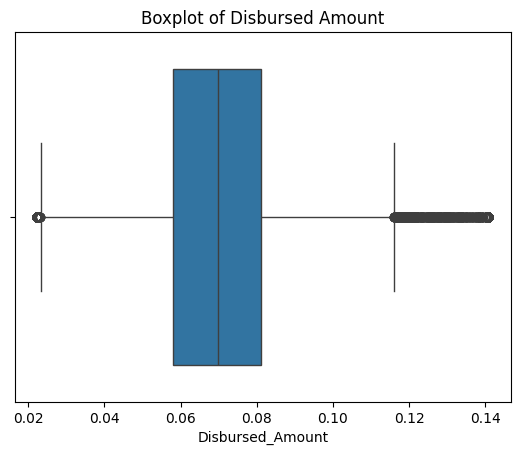

In [ ]:
# Detect outliers in numerical columns
sns.boxplot(x='Disbursed_Amount', data=loan_data_combined)
plt.title('Boxplot of Disbursed Amount')
plt.show()

# You can cap outliers if needed
upper_limit = loan_data_combined['Disbursed_Amount'].quantile(0.99)
loan_data_combined['Disbursed_Amount'] = np.where(loan_data_combined['Disbursed_Amount'] > upper_limit, upper_limit, loan_data_combined['Disbursed_Amount'])


### Data Visualization

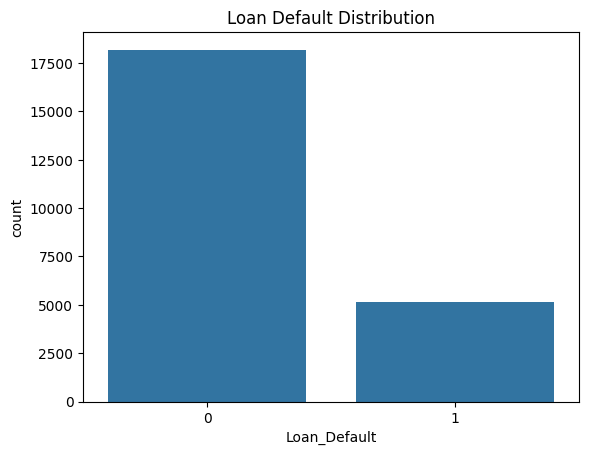

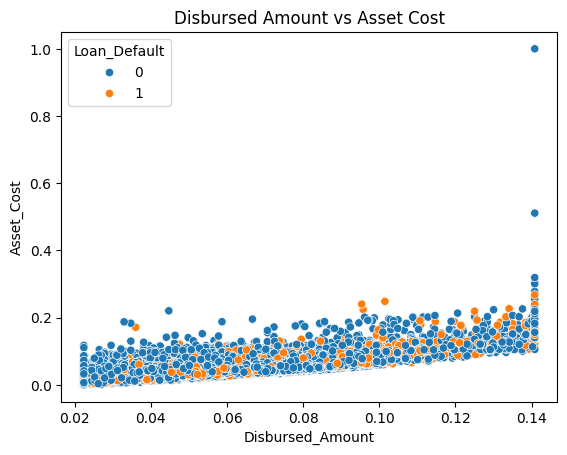

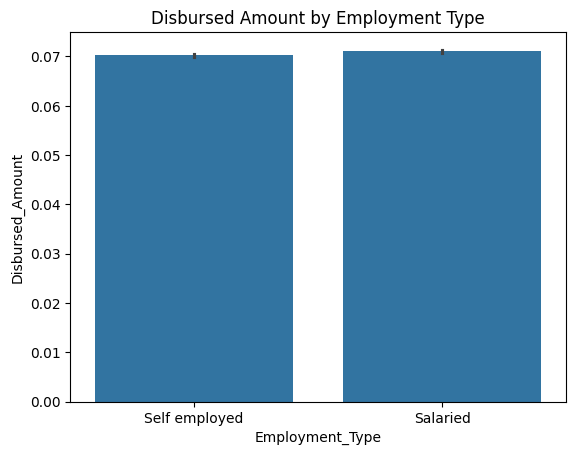

In [ ]:
# Distribution of Loan Default
sns.countplot(x='Loan_Default', data=loan_data_combined)
plt.title('Loan Default Distribution')
plt.show()

# Scatter plot for Disbursed Amount vs Asset Cost
sns.scatterplot(x='Disbursed_Amount', y='Asset_Cost', hue='Loan_Default', data=loan_data_combined)
plt.title('Disbursed Amount vs Asset Cost')
plt.show()

# Bar plot for Employment Type vs Disbursed Amount
sns.barplot(x='Employment_Type', y='Disbursed_Amount', data=loan_data_combined)
plt.title('Disbursed Amount by Employment Type')
plt.show()


# ALL the data set view

In [ ]:
city_data.head()

,City_Code,State_Code,City_Name
0,CT01,ST15,Mumbai
1,CT02,ST15,Pune
2,CT03,ST24,Chennai
3,CT04,ST24,Coimbatore
4,CT05,ST25,Hyderabad


In [ ]:
postal_Code_Master.head()

,City_Code,City_Name,Postal_Code
0,CT01,Mumbai,400001
1,CT01,Mumbai,400053
2,CT01,Mumbai,422001
3,CT02,Pune,411002
4,CT02,Pune,411006


In [ ]:
Region_Master.head()

,Region_ID,Region_Name
0,R1,North
1,R2,South
2,R3,East
3,R4,West


In [ ]:
State_Master.head()

,State_Code,State_Name
0,ST01,Andhra Pradesh
1,ST02,Arunachal Pradesh
2,ST03,Assam
3,ST04,Bihar
4,ST05,Chhattisgarh


In [ ]:
State_Region_Mapping.head()

,Region,State Name,Region_ID,State_Code
0,South,Andhra Pradesh,R2,ST01
1,East,Bihar,R3,ST04
2,West,Goa,R4,ST06
3,West,Gujarat,R4,ST07
4,North,Haryana,R1,ST08


In [ ]:
State_Region_Mapping.rename(columns={'Region':'Region_ID'}, inplace=True)

In [ ]:
branch_data.head()

,Branch_Id,Region_Code
0,1,R3
1,2,R3
2,3,R3
3,5,R3
4,7,R3


In [ ]:
#renaming Region_Code to Region_ID
branch_data.rename(columns={'Region_Code':'Region_ID'}, inplace=True)

In [ ]:
loan_data

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Age
0,1,0.039838,0.042215,56.19,64,CT01,ST15,400001,1990-06-14,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,34
1,2,0.061096,0.047308,72.15,67,CT03,ST24,600020,1991-01-01,Salaried,...,1,0,0,0,0,783,0,2yrs 6mon,0,33
2,3,0.072491,0.042938,85.00,2,CT13,ST04,801110,1993-08-16,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,31
3,4,0.061268,0.039683,77.96,217,CT06,ST22,302029,1989-01-01,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,35
4,5,0.046668,0.032681,70.72,74,CT03,ST24,600020,1974-12-31,Self employed,...,1,0,0,0,0,14,1,3yrs 1mon,1,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,0.140816,0.218511,69.59,34,CT03,ST24,600020,1982-12-14,Self employed,...,1,0,0,0,0,650,0,5yrs 10mon,1,41
23311,23312,0.113126,0.126333,65.11,5,CT15,ST20,751022,1993-07-03,Salaried,...,1,0,0,0,0,680,0,0yrs 9mon,0,31
23312,23313,0.062132,0.044937,73.86,48,CT22,ST14,453551,1994-01-01,Self employed,...,1,0,0,0,0,825,0,2yrs 3mon,0,30
23313,23314,0.099342,0.069577,86.00,2,CT03,ST24,600020,1982-10-10,Self employed,...,1,0,0,0,0,657,0,0yrs 6mon,2,41


In [ ]:
loanMap_data.head()

,Loan_Id,Loan_Default
0,1,0
1,2,0
2,3,1
3,4,0
4,5,0


In [4]:

city_postal_data = (
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(city_data, postal_Code_Master, on=['City_Code', 'City_Name'], how='left'),
                State_Master, on='State_Code', how='left'
            ),
            State_Region_Mapping, on='State_Code', how='left'
        ),
        Region_Master, on='Region_ID', how='left'
    )
)


final_merged_data = pd.merge(
    loan_data,
    city_postal_data,
    on=['City_Code', 'State_Code', 'Postal_Code'],
    how='left'
)
final_merged_data = pd.merge(
    loan_data,
    loanMap_data,
    on='Loan_Id',
    how='left'
)


final_merged_data


,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Loan_Default
0,1,36439,65850,56.19,64,CT01,ST15,400001,14-06-1990,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,0
1,2,48749,69303,72.15,67,CT03,ST24,600020,01-01-1991,Salaried,...,1,0,0,0,0,783,0,2yrs 6mon,0,0
2,3,55348,66340,85.00,2,CT13,ST04,801110,16-08-1993,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,1
3,4,48849,64133,77.96,217,CT06,ST22,302029,01-01-1989,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,0
4,5,40394,59386,70.72,74,CT03,ST24,600020,31-12-1974,Self employed,...,1,0,0,0,0,14,1,3yrs 1mon,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,CT03,ST24,600020,14-12-1982,Self employed,...,1,0,0,0,0,650,0,5yrs 10mon,1,0
23311,23312,78879,122878,65.11,5,CT15,ST20,751022,03-07-1993,Salaried,...,1,0,0,0,0,680,0,0yrs 9mon,0,0
23312,23313,49349,67695,73.86,48,CT22,ST14,453551,01-01-1994,Self employed,...,1,0,0,0,0,825,0,2yrs 3mon,0,0
23313,23314,70897,84400,86.00,2,CT03,ST24,600020,10-10-1982,Self employed,...,1,0,0,0,0,657,0,0yrs 6mon,2,0


In [5]:
final_merged_data

,Loan_Id,Disbursed_Amount,Asset_Cost,ltv,Branch_Id,City_Code,State_Code,Postal_Code,Date_of_Birth,Employment_Type,...,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,Loan_Default
0,1,36439,65850,56.19,64,CT01,ST15,400001,14-06-1990,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,0
1,2,48749,69303,72.15,67,CT03,ST24,600020,01-01-1991,Salaried,...,1,0,0,0,0,783,0,2yrs 6mon,0,0
2,3,55348,66340,85.00,2,CT13,ST04,801110,16-08-1993,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,1
3,4,48849,64133,77.96,217,CT06,ST22,302029,01-01-1989,Self employed,...,1,0,0,0,0,0,0,0yrs 0mon,0,0
4,5,40394,59386,70.72,74,CT03,ST24,600020,31-12-1974,Self employed,...,1,0,0,0,0,14,1,3yrs 1mon,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23310,23311,123661,185371,69.59,34,CT03,ST24,600020,14-12-1982,Self employed,...,1,0,0,0,0,650,0,5yrs 10mon,1,0
23311,23312,78879,122878,65.11,5,CT15,ST20,751022,03-07-1993,Salaried,...,1,0,0,0,0,680,0,0yrs 9mon,0,0
23312,23313,49349,67695,73.86,48,CT22,ST14,453551,01-01-1994,Self employed,...,1,0,0,0,0,825,0,2yrs 3mon,0,0
23313,23314,70897,84400,86.00,2,CT03,ST24,600020,10-10-1982,Self employed,...,1,0,0,0,0,657,0,0yrs 6mon,2,0


In [7]:
!pip install openpyxl


In [11]:
import pandas as pd
import openpyxl as xls

In [16]:
excel_file = pd.ExcelWriter("final_merged_data.xlsx")

In [18]:
final_merged_data.to_excel(excel_file)

In [20]:
excel_file.save()

AttributeError: 'OpenpyxlWriter' object has no attribute 'save'